In [1]:
import pandas as pd

In [2]:
tables_concat = pd.read_csv("tables_all_20_langs_concat.csv")

In [3]:
tables_concat.head()

,Unnamed: 0,Unnamed: 1,0,1,2,3,4,5
0,language=Logical-max_model_size=8-max-expr-len...,1,Monotonicity,1.00,0.857143,0.640777,0.574257,0.605484
1,language=Logical-max_model_size=8-max-expr-len...,2,Conservativity,0.75,0.510204,0.485437,0.277228,0.156128
2,language=Logical-max_model_size=8-max-expr-len...,3,All,0.75,0.510204,0.349515,0.202970,0.133744
3,language=Logical_and_comp-max_model_size=8-max...,1,Monotonicity,1.00,0.847826,0.625000,0.607143,0.662093
4,language=Logical_and_comp-max_model_size=8-max...,2,Conservativity,1.00,0.500000,0.750000,0.535714,0.084048


In [4]:
mono_tab = tables_concat[tables_concat["0"]=="Monotonicity"].drop_duplicates()

In [5]:
len(mono_tab)

20

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

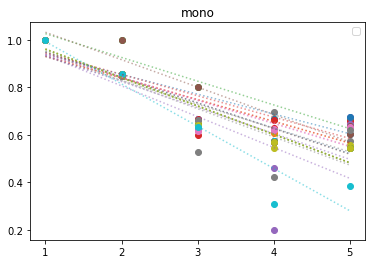

In [36]:
ttest = []
for x in range(len(mono_tab)):
    x_plot = [1,2,3,4,5]
    s = [str(j) for j in x_plot]
    y_plot = [float(i) for i in mono_tab[s].iloc[x]]
    title = mono_tab.iloc[x][0][9:-37]
    p = plt.scatter(x_plot,y_plot,label=title)
#     plt.plot(x_plot,y_plot,color="gray",alpha=0.2)
    a,b = np.polyfit(x_plot, y_plot, deg=1)
    xnums = np.linspace(1, 5, num=20)
    r = plt.plot(xnums,a*xnums+b,linestyle="dotted",alpha=0.5)
    ry = (r[0].get_ydata())
    ttest+=[scipy.stats.ttest_ind(y_plot,ry)]
plt.legend([])
plt.xticks([1,2,3,4,5])
ax = plt.gca()
ax.set_title("mono")
plt.savefig("mono_withreg.png")
    

In [20]:
ttest

[Ttest_indResult(statistic=-1.5446349910643381e-15, pvalue=0.9999999999999988),
 Ttest_indResult(statistic=1.7665214695392976e-15, pvalue=0.9999999999999987),
 Ttest_indResult(statistic=-3.3394687433032533e-15, pvalue=0.9999999999999973),
 Ttest_indResult(statistic=1.7642590473284685e-15, pvalue=0.9999999999999987),
 Ttest_indResult(statistic=2.2992462725913725e-15, pvalue=0.9999999999999982),
 Ttest_indResult(statistic=-1.536016749228132e-15, pvalue=0.9999999999999988),
 Ttest_indResult(statistic=-3.3780046745468633e-15, pvalue=0.9999999999999973),
 Ttest_indResult(statistic=0.0, pvalue=1.0),
 Ttest_indResult(statistic=0.0, pvalue=1.0),
 Ttest_indResult(statistic=1.4016348445869272e-15, pvalue=0.9999999999999989),
 Ttest_indResult(statistic=1.961236201401094e-15, pvalue=0.9999999999999984),
 Ttest_indResult(statistic=-2.7988096143605974e-15, pvalue=0.9999999999999978),
 Ttest_indResult(statistic=-2.7988096143605974e-15, pvalue=0.9999999999999978),
 Ttest_indResult(statistic=1.83875238

AxesSubplot(0.125,0.125;0.775x0.755)


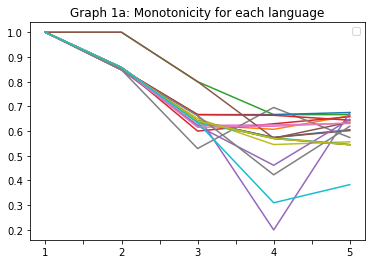

In [22]:
ax = mono_tab[["1","2","3","4","5"]].transpose().plot()
print(ax)
ax.set_title("Graph 1a: Monotonicity for each language")



ax.legend([])
fig = ax.get_figure()
# fig.savefig("mono_all_langs_g.png")

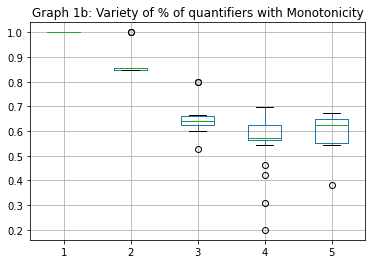

In [13]:
ax=mono_tab[["1","2","3","4","5"]].boxplot()
ax.set_title("Graph 1b: Variety of % of quantifiers with Monotonicity")
fig = ax.get_figure()
fig.savefig("Vari_mon_g.png")

we can see that it is going down, but then for 5 it does go up.
it might be an outlier, but it might be someting we would only be able to spot if we allow for longer expressions.

In [25]:
con_tab = tables_concat[tables_concat["0"]=="Conservativity"]


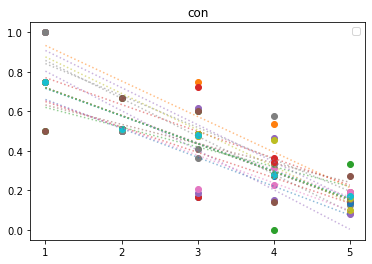

In [38]:
ttest = []
for x in range(len(con_tab)):
    x_plot = [1,2,3,4,5]
    s = [str(j) for j in x_plot]
    y_plot = [float(i) for i in con_tab[s].iloc[x]]
    title = con_tab.iloc[x][0][9:-37]
    p = plt.scatter(x_plot,y_plot,label=title)
#     plt.plot(x_plot,y_plot,color="gray",alpha=0.2)
    a,b = np.polyfit(x_plot, y_plot, deg=1)
    xnums = np.linspace(1, 5, num=20)
    r = plt.plot(xnums,a*xnums+b,linestyle="dotted",alpha=0.5)
    ry = (r[0].get_ydata())
    ttest+=[scipy.stats.ttest_ind(y_plot,ry)]
plt.legend([])
plt.xticks([1,2,3,4,5])
ax = plt.gca()
ax.set_title("con")
plt.savefig("con_withreg.png")
    

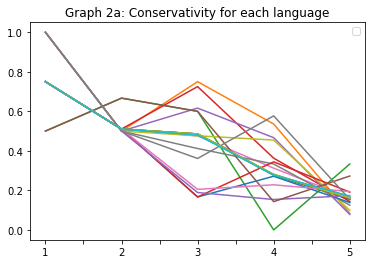

In [14]:
ax = con_tab[["1","2","3","4","5"]].transpose().plot()
ax.set_title("Graph 2a: Conservativity for each language")
ax.legend([])
fig = ax.get_figure()
fig.savefig("con_all_langs_g.png")


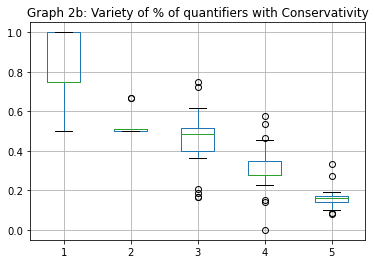

In [15]:

ax=con_tab[["1","2","3","4","5"]].boxplot()
ax.set_title("Graph 2b: Variety of % of quantifiers with Conservativity")
fig = ax.get_figure()
fig.savefig("Vari_con_g.png")

In [27]:
all_tab = tables_concat[tables_concat["0"]=="All"]


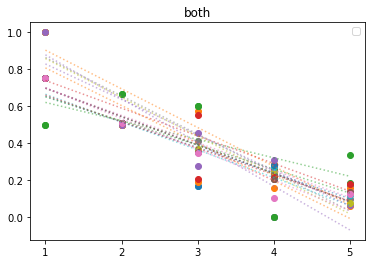

In [39]:
ttest = []
for x in range(len(all_tab)):
    x_plot = [1,2,3,4,5]
    s = [str(j) for j in x_plot]
    y_plot = [float(i) for i in all_tab[s].iloc[x]]
    title = all_tab.iloc[x][0][9:-37]
    p = plt.scatter(x_plot,y_plot,label=title)
#     plt.plot(x_plot,y_plot,color="gray",alpha=0.2)
    a,b = np.polyfit(x_plot, y_plot, deg=1)
    xnums = np.linspace(1, 5, num=20)
    r = plt.plot(xnums,a*xnums+b,linestyle="dotted",alpha=0.5)
    ry = (r[0].get_ydata())
    ttest+=[scipy.stats.ttest_ind(y_plot,ry)]
plt.legend([])
plt.xticks([1,2,3,4,5])
ax = plt.gca()
ax.set_title("both")
plt.savefig("both_withreg.png")
    

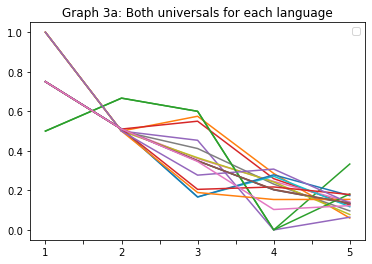

In [16]:
ax = all_tab[["1","2","3","4","5"]].transpose().plot()
ax.set_title("Graph 3a: Both universals for each language")
ax.legend([])
fig = ax.get_figure()
fig.savefig("all_all_langs_g.png")


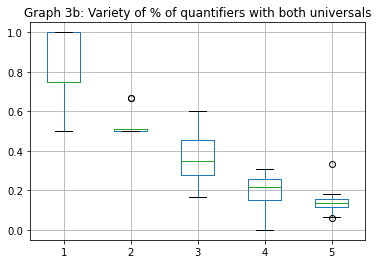

In [17]:

ax=all_tab[["1","2","3","4","5"]].boxplot()
ax.set_title("Graph 3b: Variety of % of quantifiers with both universals")
fig = ax.get_figure()
fig.savefig("Vari_all_g.png")

In [3]:
for i in tables_concat.columns:
    print(type(i))
    print(i)

<class 'str'>
Unnamed: 0
<class 'str'>
Unnamed: 1
<class 'str'>
0
<class 'str'>
1
<class 'str'>
2
<class 'str'>
3
<class 'str'>
4
<class 'str'>
5


In [9]:
row_titles = ["Monotonicity","Conservativity","All"]
col_titles = [str(i) for i in range(1,6)]

x = {}

for r in row_titles:
    mid = {}
    for c in col_titles:
        mid.update({c:tables_concat.loc[tables_concat["0"] == r,c].mean()})
    x.update({r:mid})
        

['1', '2', '3', '4', '5']


In [10]:
x

{'Monotonicity': {'1': 1.0,
  '2': 0.8680256376371085,
  '3': 0.6498525684985846,
  '4': 0.5558497233580473,
  '5': 0.602443273785769},
 'Conservativity': {'1': 0.8,
  '2': 0.5228325372702272,
  '3': 0.45662317631234906,
  '4': 0.30681674828263106,
  '5': 0.16395292913503293},
 'All': {'1': 0.8088235294117647,
  '2': 0.5250610882650931,
  '3': 0.371496757507033,
  '4': 0.18872163337873554,
  '5': 0.13910848595509842}}

In [11]:
import matplotlib.pyplot as plt

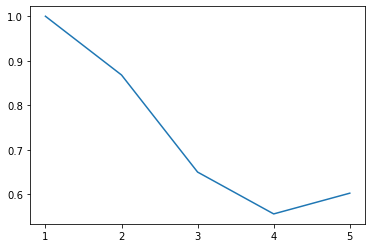

In [12]:
plt.plot(list(x["Monotonicity"].keys()),list(x["Monotonicity"].values()))

Text(27.0, 0.5, '% of quantifiers in a language in this length')

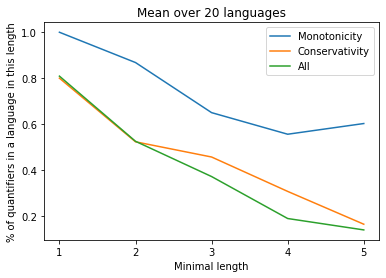

In [13]:
for title in row_titles:
    plt.plot(list(x[title].keys()),list(x[title].values()),label=title)
    
    
plt.title("Mean over 20 languages")
plt.savefig("mean over 20 langs.png")
plt.legend()
plt.xlabel("Minimal length")
plt.ylabel("% of quantifiers in a language in this length")


In [15]:
import numpy as np

Text(27.0, 0.5, '% of quantifiers in a language in this length')

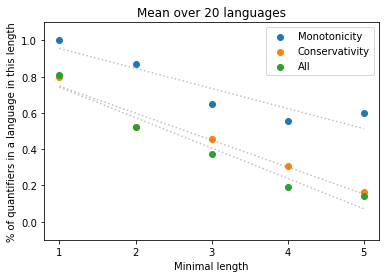

In [41]:
for title in row_titles:
    x_plot = [int(i) for i in list(x[title].keys())]
    y_plot = [float(j) for j in list(x[title].values())]
    p = plt.scatter(x_plot,y_plot,label=title)
    
    a,b = np.polyfit(x_plot, y_plot, deg=1)
    xnums = np.linspace(1, 5, num=20)
    plt.plot(xnums,a*xnums+b,linestyle="dotted",color="gray",alpha=0.5)
    
ax = plt.gca()
ax.set_ylim([-0.1,1.1])
plt.title("Mean over 20 languages")
plt.savefig("mean over 20 langs.png")
plt.legend()
plt.xlabel("Minimal length")
plt.xticks([1,2,3,4,5])
plt.ylabel("% of quantifiers in a language in this length")



Now, I'd like to collect the original data so that I could count the phrases that have the universal vs. the ones that don't.

In [43]:
import os
from os import listdir
from os.path import isfile, join

In [44]:
mypath = os.getcwd()
onlyXLfiles = [f for f in listdir(mypath) if isfile(join(mypath, f)) and f[-4:]=="xlsx" and f[:4] == "lang"]

In [45]:
type(onlyXLfiles)

list

In [59]:
dfs = {}
for f in onlyXLfiles:
    xl = pd.ExcelFile(f)
    
    dfs.update({f:pd.read_excel(xl, xl.sheet_names[-1])})

In [60]:
len(dfs)

24

In [61]:
dfs.keys()

dict_keys(['language=Logical-max_model_size=8-max-expr-len=5.xlsx', 'language=Logical_and_comp-max_model_size=8-max-expr-len=5.xlsx', 'language=Logical_and_comp_nocard-max_model_size=8-max-expr-len=5.xlsx', 'language=Logical_and_comp_subset-max_model_size=8-max-expr-len=5.xlsx', 'language=Logical_and_diff-max_model_size=8-max-expr-len=5.xlsx', 'language=Logical_comp-max_model_size=8-max-expr-len=5.xlsx', 'language=Logical_comp_nodiff-max_model_size=8-max-expr-len=5.xlsx', 'language=Logical_entail_comp-max_model_size=8-max-expr-len=5.xlsx', 'language=Logical_entail_diff-max_model_size=8-max-expr-len=5.xlsx', 'language=Logical_nand-max_model_size=8-max-expr-len=5 (version 1).xlsx', 'language=Logical_nand_set-max_model_size=8-max-expr-len=5.xlsx', 'language=Logical_nor-max_model_size=8-max-expr-len=5.xlsx', 'language=Logical_nor_only-max_model_size=8-max-expr-len=5.xlsx', 'language=Logical_nor_set-max_model_size=8-max-expr-len=5.xlsx', 'language=Logical_union_comp-max_model_size=8-max-exp

In [62]:
print(dfs[list(dfs.keys())[0]])

      expr_length                                         expression  \
0               1                                    ('>', '0', '0')   
1               1                               ('subset', 'A', 'B')   
2               1                                    ('>', '1', '0')   
3               1                               ('subset', 'B', 'A')   
4               2                          ('>', '2', ('card', 'B'))   
...           ...                                                ...   
2140            5  ('or', ('>', '2', ('card', 'B')), ('=', ('card...   
2141            5  ('or', ('>', '2', ('card', 'B')), ('=', ('card...   
2142            5  ('or', ('>', '2', ('card', 'B')), ('=', ('card...   
2143            5  ('or', ('>', '2', ('card', 'A')), ('>', ('card...   
2144            5  ('not', ('or', ('subset', 'A', 'B'), ('=', ('c...   

      monotonicity  quantity  conservativity  flo-mon  flo-con    lempel_ziv  \
0              1.0         1        1.000000        1  

In [68]:
for lang, df in dfs.items():
    print(df.columns)
    
    

Index(['expr_length', 'expression', 'monotonicity', 'quantity',
       'conservativity', 'flo-mon', 'flo-con', 'lempel_ziv', 'uniformity',
       'max_model_size', 'lot', 'subsets', 'date'],
      dtype='object')
Index(['expr_length', 'expression', 'monotonicity', 'quantity',
       'conservativity', 'flo-mon', 'flo-con', 'lempel_ziv', 'uniformity',
       'max_model_size', 'lot', 'subsets', 'date'],
      dtype='object')
Index(['expr_length', 'expression', 'monotonicity', 'quantity',
       'conservativity', 'fo-mo', 'flo-con', 'lempel_ziv', 'uniformity',
       'max_model_size', 'lot', 'subsets', 'date'],
      dtype='object')
Index(['expr_length', 'expression', 'monotonicity', 'quantity',
       'conservativity', 'flo-mon', 'flo-con', 'lempel_ziv', 'uniformity',
       'max_model_size', 'lot', 'subsets', 'date'],
      dtype='object')
Index(['expr_length', 'expression', 'monotonicity', 'quantity',
       'conservativity', 'flo-mon', 'flo-con', 'lempel_ziv', 'uniformity',
       'max

In [71]:
universals = ["flo-mon","flo-con"]

for lang, df in dfs.items():
    for u in universals:
        if u not in df.columns:
            print(lang + " : doesn't have : " + u)
    

language=Logical_and_comp_nocard-max_model_size=8-max-expr-len=5.xlsx : doesn't have : flo-mon
language=Logical_entail_comp-max_model_size=8-max-expr-len=5.xlsx : doesn't have : flo-mon
language=Logical_entail_comp-max_model_size=8-max-expr-len=5.xlsx : doesn't have : flo-con
language=Logical_nand-max_model_size=8-max-expr-len=5 (version 1).xlsx : doesn't have : flo-mon
language=Logical_nor-max_model_size=8-max-expr-len=5.xlsx : doesn't have : flo-mon
language=Logical_nor_only-max_model_size=8-max-expr-len=5.xlsx : doesn't have : flo-mon
language=Logical_union_comp_nocard-max_model_size=8-max-expr-len=7.xlsx : doesn't have : flo-mon
language=Logical_union_comp_subset-max_model_size=8-max-expr-len=5.xlsx : doesn't have : flo-con
language=Logical_xor_only-max_model_size=8-max-expr-len=5.xlsx : doesn't have : flo-mon
language=Logical_xor_only-max_model_size=8-max-expr-len=5.xlsx : doesn't have : flo-con
language=Logical_xor_or-max_model_size=8-max-expr-len=5.xlsx : doesn't have : flo-mon


In [75]:
import re

In [91]:
pattern_flo_mon = re.compile("f.o.mo")
pattern_flo_con = re.compile("f.o.co.")
patterns = [pattern_flo_mon,pattern_flo_con]

In [94]:
for lang, df in dfs.items():
    print(df['flo-con'].mean())


0.19254079254079254
0.1843191196698762
0.45454545454545453
0.2144927536231884
0.18538565629228687
0.19058606368251038
0.1978131212723658


KeyError: 'flo-con'

In [110]:
import scipy.stats as st

In [118]:
for lang, df in dfs.items():
    dfs[lang]["flo_mon"] = (np.floor(df.monotonicity))
    dfs[lang] = df.drop(["z_flo_mon"],axis='columns')
    
    

In [119]:
dfs[list(dfs.keys())[0]]

,expr_length,expression,monotonicity,quantity,conservativity,flo-mon,flo-con,lempel_ziv,uniformity,max_model_size,lot,subsets,date,flo_mon
0,1,"('>', '0', '0')",1.0,1,1.000000,1,1,13.264443,1.000000,8,Logical,3_AnotB_AandB_BnotA,2022-06-07,1.0
1,1,"('subset', 'A', 'B')",1.0,1,1.000000,1,1,4264.518296,0.948171,8,Logical,3_AnotB_AandB_BnotA,2022-06-07,1.0
2,1,"('>', '1', '0')",1.0,1,1.000000,1,1,13.264443,1.000000,8,Logical,3_AnotB_AandB_BnotA,2022-06-07,1.0
3,1,"('subset', 'B', 'A')",1.0,1,0.482210,1,0,3654.353936,0.948171,8,Logical,3_AnotB_AandB_BnotA,2022-06-07,1.0
4,2,"('>', '2', ('card', 'B'))",1.0,1,0.460875,1,0,2546.772979,0.991870,8,Logical,3_AnotB_AandB_BnotA,2022-06-07,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,5,"('or', ('>', '2', ('card', 'B')), ('=', ('card...",1.0,1,0.962444,1,0,8966.763198,0.759146,8,Logical,3_AnotB_AandB_BnotA,2022-06-07,1.0
2141,5,"('or', ('>', '2', ('card', 'B')), ('=', ('card...",1.0,1,0.937902,1,0,6095.011375,0.876423,8,Logical,3_AnotB_AandB_BnotA,2022-06-07,1.0
2142,5,"('or', ('>', '2', ('card', 'B')), ('=', ('card...",1.0,1,0.825396,1,0,3521.709510,0.966768,8,Logical,3_AnotB_AandB_BnotA,2022-06-07,1.0
2143,5,"('or', ('>', '2', ('card', 'A')), ('>', ('card...",1.0,1,0.677653,1,0,6698.543513,0.851321,8,Logical,3_AnotB_AandB_BnotA,2022-06-07,1.0


In [120]:
for lang, df in dfs.items():
    dfs[lang]["z_ML"] = st.zscore((df.expr_length))
    
    

In [124]:
for lang, df in dfs.items():
    dfs[lang]["flo_con"] = np.floor((df.conservativity))
    
    

In [127]:
universals = ["flo_mon","flo_con"]

In [131]:
table_2 = {}

for lang, df in dfs.items():
    for u in universals:
        avg_ML_forMon = df[df.flo_mon == 1].z_ML.mean()
        avg_ML_forNoMon = df[df.flo_mon == 0].z_ML.mean()
        avg_ML_forCon = df[df.flo_con == 1].z_ML.mean()
        avg_ML_forNoCon = df[df.flo_con == 0].z_ML.mean()
        table_2[lang] = {"Monotonicity":{"YES":avg_ML_forMon,"NO":avg_ML_forNoMon}, "Conservativity":{"YES":avg_ML_forCon,"NO":avg_ML_forNoCon}}

In [132]:
table_2

{'language=Logical-max_model_size=8-max-expr-len=5.xlsx': {'Monotonicity': {'YES': -0.04692901527410482,
   'NO': 0.07362516168752582},
  'Conservativity': {'YES': -0.4798388378575405, 'NO': 0.1144188452858932}},
 'language=Logical_and_comp-max_model_size=8-max-expr-len=5.xlsx': {'Monotonicity': {'YES': -0.048340334542799505,
   'NO': 0.09748299828962757},
  'Conservativity': {'YES': -0.9845383006035178, 'NO': 0.22247577113131883}},
 'language=Logical_and_comp_nocard-max_model_size=8-max-expr-len=5.xlsx': {'Monotonicity': {'YES': -0.1688380033632932,
   'NO': 0.7597710151348211},
  'Conservativity': {'YES': -0.3174154463229918, 'NO': 0.2645128719358268}},
 'language=Logical_and_comp_subset-max_model_size=8-max-expr-len=5.xlsx': {'Monotonicity': {'YES': -0.04458677605695835,
   'NO': 0.08764048245005718},
  'Conservativity': {'YES': -0.636037729394525, 'NO': 0.1736781991704541}},
 'language=Logical_and_diff-max_model_size=8-max-expr-len=5.xlsx': {'Monotonicity': {'YES': -0.0287190793552

In [134]:
table_2_df = pd.DataFrame.from_dict(table_2)

In [137]:
table_2_df.transpose()

,Monotonicity,Conservativity
language=Logical-max_model_size=8-max-expr-len=5.xlsx,"{'YES': -0.04692901527410482, 'NO': 0.07362516...","{'YES': -0.4798388378575405, 'NO': 0.114418845..."
language=Logical_and_comp-max_model_size=8-max-expr-len=5.xlsx,"{'YES': -0.048340334542799505, 'NO': 0.0974829...","{'YES': -0.9845383006035178, 'NO': 0.222475771..."
language=Logical_and_comp_nocard-max_model_size=8-max-expr-len=5.xlsx,"{'YES': -0.1688380033632932, 'NO': 0.759771015...","{'YES': -0.3174154463229918, 'NO': 0.264512871..."
language=Logical_and_comp_subset-max_model_size=8-max-expr-len=5.xlsx,"{'YES': -0.04458677605695835, 'NO': 0.08764048...","{'YES': -0.636037729394525, 'NO': 0.1736781991..."
language=Logical_and_diff-max_model_size=8-max-expr-len=5.xlsx,"{'YES': -0.028719079355289917, 'NO': 0.0572056...","{'YES': -1.0263082786139144, 'NO': 0.233561850..."
language=Logical_comp-max_model_size=8-max-expr-len=5.xlsx,"{'YES': -0.048807025977124774, 'NO': 0.0756221...","{'YES': -0.48595133849193145, 'NO': 0.11442297..."
language=Logical_comp_nodiff-max_model_size=8-max-expr-len=5.xlsx,"{'YES': -0.04122702754133695, 'NO': 0.07209097...","{'YES': -0.44340038592190223, 'NO': 0.10933912..."
language=Logical_entail_comp-max_model_size=8-max-expr-len=5.xlsx,"{'YES': -0.09591372368144135, 'NO': 0.13980281...","{'YES': -0.6095178297109792, 'NO': 0.115973122..."
language=Logical_entail_diff-max_model_size=8-max-expr-len=5.xlsx,"{'YES': -0.09741488456507277, 'NO': 0.13086457...","{'YES': -0.8245332978666884, 'NO': 0.153343082..."
language=Logical_nand-max_model_size=8-max-expr-len=5 (version 1).xlsx,"{'YES': -0.09161572633745158, 'NO': 0.11784116...","{'YES': -0.47526465016231473, 'NO': 0.12186273..."


In [164]:
df_mi = pd.MultiIndex.from_product(
(("Monotonicity","Conservativity"),
 ("YES","NO","diff")))

In [165]:
table_2_try = {}

for lang, df in dfs.items():
    for u in universals:
        avg_ML_forMon = df[df.flo_mon == 1].z_ML.mean()
        avg_ML_forNoMon = df[df.flo_mon == 0].z_ML.mean()
        avg_ML_forCon = df[df.flo_con == 1].z_ML.mean()
        avg_ML_forNoCon = df[df.flo_con == 0].z_ML.mean()
        table_2_try[lang] = {"a":avg_ML_forMon,"b":avg_ML_forNoMon,"ba":avg_ML_forNoMon-avg_ML_forMon,"c":avg_ML_forCon,"d":avg_ML_forNoCon,"dc":avg_ML_forNoCon-avg_ML_forCon}

In [166]:
table_2_try_df = pd.DataFrame.from_dict(table_2_try).transpose()

In [167]:
table_2_try_df.columns = df_mi

In [168]:
table_2_try_df

Monotonicity            \
                                                            YES        NO   
language=Logical-max_model_size=8-max-expr-len=...    -0.046929  0.073625   
language=Logical_and_comp-max_model_size=8-max-...    -0.048340  0.097483   
language=Logical_and_comp_nocard-max_model_size...    -0.168838  0.759771   
language=Logical_and_comp_subset-max_model_size...    -0.044587  0.087640   
language=Logical_and_diff-max_model_size=8-max-...    -0.028719  0.057206   
language=Logical_comp-max_model_size=8-max-expr...    -0.048807  0.075622   
language=Logical_comp_nodiff-max_model_size=8-m...    -0.041227  0.072091   
language=Logical_entail_comp-max_model_size=8-m...    -0.095914  0.139803   
language=Logical_entail_diff-max_model_size=8-m...    -0.097415  0.130865   
language=Logical_nand-max_model_size=8-max-expr...    -0.091616  0.117841   
language=Logical_nand_set-max_model_size=8-max-...    -0.060003  0.131198   
language=Logical_nor-max_model_size=8-max-expr-...    -0.092498  0.118976   
language=Logical_nor_only-max_model_size=8-max-...    -0.092498  0.118976   
language=Logical_nor_set-max_model_size=8-max-e...    -0.069777  0.134316   
language=Logical_union_comp-max_model_size=8-ma...    -0.055268  0.105125   
language=Logical_union_comp_nocard-max_model_si...    -0.202053  0.580904   
language=Logical_union_comp_nocard-max_model_si...    -0.641162  0.461637   
language=Logical_union_comp_subset-max_model_si...    -0.058627  0.105086   
language=Logical_union_diff-max_model_size=8-ma...    -0.060349  0.100346   
language=Logical_xor_and-max_model_size=8-max-e...    -0.092498  0.118976   
language=Logical_xor_not-max_model_size=8-max-e...    -0.773353  0.220958   
language=Logical_xor_only-max_model_size=8-max-...    -0.766084  0.227431   
language=Logical_xor_or-max_model_size=8-max-ex...    -0.183451  0.122348   
language=Logical_xor_or-max_model_size=8-max-ex...    -0.183451  0.122348   

                                                             Conservativity  \
                                                        diff            YES   
language=Logical-max_model_size=8-max-expr-len=...  0.120554      -0.479839   
language=Logical_and_comp-max_model_size=8-max-...  0.145823      -0.984538   
language=Logical_and_comp_nocard-max_model_size...  0.928609      -0.317415   
language=Logical_and_comp_subset-max_model_size...  0.132227      -0.636038   
language=Logical_and_diff-max_model_size=8-max-...  0.085925      -1.026308   
language=Logical_comp-max_model_size=8-max-expr...  0.124429      -0.485951   
language=Logical_comp_nodiff-max_model_size=8-m...  0.113318      -0.443400   
language=Logical_entail_comp-max_model_size=8-m...  0.235717      -0.609518   
language=Logical_entail_diff-max_model_size=8-m...  0.228279      -0.824533   
language=Logical_nand-max_model_size=8-max-expr...  0.209457      -0.475265   
language=Logical_nand_set-max_model_size=8-max-...  0.191201      -0.561404   
language=Logical_nor-max_model_size=8-max-expr-...  0.211474      -0.476632   
language=Logical_nor_only-max_model_size=8-max-...  0.211474      -0.476632   
language=Logical_nor_set-max_model_size=8-max-e...  0.204093      -0.371027   
language=Logical_union_comp-max_model_size=8-ma...  0.160393      -0.367568   
language=Logical_union_comp_nocard-max_model_si...  0.782957      -0.403661   
language=Logical_union_comp_nocard-max_model_si...  1.102799      -0.941946   
language=Logical_union_comp_subset-max_model_si...  0.163713      -0.285127   
language=Logical_union_diff-max_model_size=8-ma...  0.160694      -0.514798   
language=Logical_xor_and-max_model_size=8-max-e...  0.211474      -0.476632   
language=Logical_xor_not-max_model_size=8-max-e...  0.994311      -0.359164   
language=Logical_xor_only-max_model_size=8-max-...  0.993515      -0.340536   
language=Logical_xor_or-max_model_size=8-max-ex...  0.305799      -0.423576   
language=Logical_xor_or-max_model_size=8-max-ex...  0.305799      -0.4235

In [149]:
table_2_df = table_2_try_df

In [200]:
table_2_df[("Monotonicity","diff")] = table_2_df[("Monotonicity","NO")]-table_2_df[("Monotonicity","YES")]

In [201]:
table_2_df[("Consevativity","diff")] = table_2_df[("Consevativity","NO")]-table_2_df[("Consevativity","YES")]

In [202]:
table_2_df

Monotonicity            \
                                                            YES        NO   
language=Logical-max_model_size=8-max-expr-len=...    -0.046929  0.073625   
language=Logical_and_comp-max_model_size=8-max-...    -0.048340  0.097483   
language=Logical_and_comp_nocard-max_model_size...    -0.168838  0.759771   
language=Logical_and_comp_subset-max_model_size...    -0.044587  0.087640   
language=Logical_and_diff-max_model_size=8-max-...    -0.028719  0.057206   
language=Logical_comp-max_model_size=8-max-expr...    -0.048807  0.075622   
language=Logical_comp_nodiff-max_model_size=8-m...    -0.041227  0.072091   
language=Logical_entail_comp-max_model_size=8-m...    -0.095914  0.139803   
language=Logical_entail_diff-max_model_size=8-m...    -0.097415  0.130865   
language=Logical_nand-max_model_size=8-max-expr...    -0.091616  0.117841   
language=Logical_nand_set-max_model_size=8-max-...    -0.060003  0.131198   
language=Logical_nor-max_model_size=8-max-expr-...    -0.092498  0.118976   
language=Logical_nor_only-max_model_size=8-max-...    -0.092498  0.118976   
language=Logical_nor_set-max_model_size=8-max-e...    -0.069777  0.134316   
language=Logical_union_comp-max_model_size=8-ma...    -0.055268  0.105125   
language=Logical_union_comp_nocard-max_model_si...    -0.202053  0.580904   
language=Logical_union_comp_nocard-max_model_si...    -0.641162  0.461637   
language=Logical_union_comp_subset-max_model_si...    -0.058627  0.105086   
language=Logical_union_diff-max_model_size=8-ma...    -0.060349  0.100346   
language=Logical_xor_and-max_model_size=8-max-e...    -0.092498  0.118976   
language=Logical_xor_not-max_model_size=8-max-e...    -0.773353  0.220958   
language=Logical_xor_only-max_model_size=8-max-...    -0.766084  0.227431   
language=Logical_xor_or-max_model_size=8-max-ex...    -0.183451  0.122348   
language=Logical_xor_or-max_model_size=8-max-ex...    -0.183451  0.122348   

                                                   Consevativity            \
                                                             YES        NO   
language=Logical-max_model_size=8-max-expr-len=...     -0.479839  0.114419   
language=Logical_and_comp-max_model_size=8-max-...     -0.984538  0.222476   
language=Logical_and_comp_nocard-max_model_size...     -0.317415  0.264513   
language=Logical_and_comp_subset-max_model_size...     -0.636038  0.173678   
language=Logical_and_diff-max_model_size=8-max-...     -1.026308  0.233562   
language=Logical_comp-max_model_size=8-max-expr...     -0.485951  0.114423   
language=Logical_comp_nodiff-max_model_size=8-m...     -0.443400  0.109339   
language=Logical_entail_comp-max_model_size=8-m...     -0.609518  0.115973   
language=Logical_entail_diff-max_model_size=8-m...     -0.824533  0.153343   
language=Logical_nand-max_model_size=8-max-expr...     -0.475265  0.121863   
language=Logical_nand_set-max_model_size=8-max-...     -0.561404  0.120604   
language=Logical_nor-max_model_size=8-max-expr-...     -0.476632  0.122213   
language=Logical_nor_only-max_model_size=8-max-...     -0.476632  0.122213   
language=Logical_nor_set-max_model_size=8-max-e...     -0.371027  0.109532   
language=Logical_union_comp-max_model_size=8-ma...     -0.367568  0.088458   
language=Logical_union_comp_nocard-max_model_si...     -0.403661  0.254944   
language=Logical_union_comp_nocard-max_model_si...     -0.941946  0.215302   
language=Logical_union_comp_subset-max_model_si...     -0.285127  0.076706   
language=Logical_union_diff-max_model_size=8-ma...     -0.514798  0.142637   
language=Logical_xor_and-max_model_size=8-max-e...     -0.476632  0.122213   
language=Logical_xor_not-max_model_size=8-max-e...     -0.359164  0.126064   
language=Logical_xor_only-max_model_size=8-max-...     -0.340536  0.117453   
language=Logical_xor_or-max_model_size=8-max-ex...     -0.423576  0.109486   
language=Logical_xor_or-max_model_size=8-max-ex...     -0.423576  0.109486   

                   

In [174]:
ttest_mono = st.ttest_ind(table_2_df[("Monotonicity","YES")],table_2_df[("Monotonicity","NO")],equal_var=False)

In [182]:
round(ttest_mono.pvalue,7)

3e-07

In [184]:
ttest_con = st.ttest_ind(table_2_df[("Consevativity","YES")],table_2_df[("Consevativity","NO")],equal_var=False)

In [194]:
round(ttest_con.pvalue,14)

2e-14

so this is significant

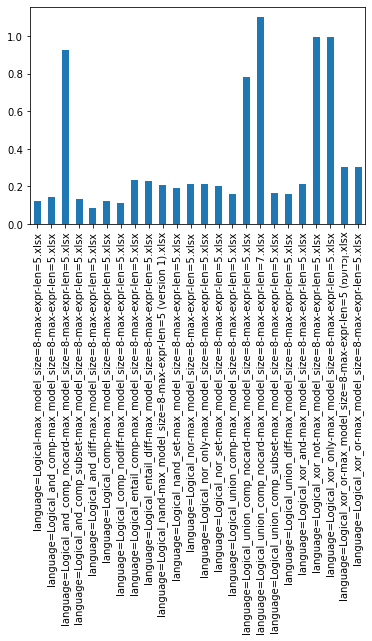

In [208]:
table_2_df[("Monotonicity","diff")].plot.bar()

In [209]:
langs = list(table_2_df.index)

In [215]:
new_langs = []
for l in langs:
    start = l.find("=")+1
    end = (l.find("-"))
    new_langs += [l[start:end]]
print(new_langs)

['Logical', 'Logical_and_comp', 'Logical_and_comp_nocard', 'Logical_and_comp_subset', 'Logical_and_diff', 'Logical_comp', 'Logical_comp_nodiff', 'Logical_entail_comp', 'Logical_entail_diff', 'Logical_nand', 'Logical_nand_set', 'Logical_nor', 'Logical_nor_only', 'Logical_nor_set', 'Logical_union_comp', 'Logical_union_comp_nocard', 'Logical_union_comp_nocard', 'Logical_union_comp_subset', 'Logical_union_diff', 'Logical_xor_and', 'Logical_xor_not', 'Logical_xor_only', 'Logical_xor_or', 'Logical_xor_or']


In [216]:
table_2_df.index = new_langs

Text(0.5, 1.0, 'diff in mean normalized ML between quantifiers with Monotonicity and without')

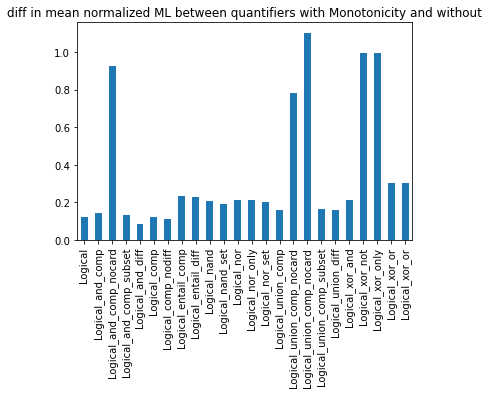

In [223]:
ax = table_2_df[("Monotonicity","diff")].plot.bar()
ax.set_title("diff in mean normalized ML between quantifiers with Monotonicity and without")

the nocard languages, and xor languages, has the most difference in mean ML between quantifiers with and without universals

Text(0.5, 1.0, 'diff in mean normalized ML between quantifiers with Conservativity and without')

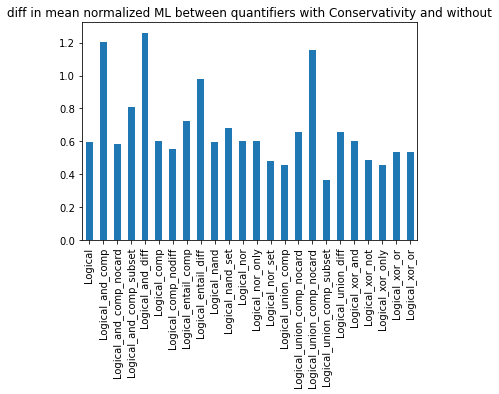

In [225]:
ax = table_2_df[("Consevativity","diff")].plot.bar()
ax.set_title("diff in mean normalized ML between quantifiers with Conservativity and without")

In [228]:
table_2_df["Consevativity"]


,YES,NO,diff
Logical,-0.479839,0.114419,0.594258
Logical_and_comp,-0.984538,0.222476,1.207014
Logical_and_comp_nocard,-0.317415,0.264513,0.581928
Logical_and_comp_subset,-0.636038,0.173678,0.809716
Logical_and_diff,-1.026308,0.233562,1.259870
Logical_comp,-0.485951,0.114423,0.600374
Logical_comp_nodiff,-0.443400,0.109339,0.552740
Logical_entail_comp,-0.609518,0.115973,0.725491
Logical_entail_diff,-0.824533,0.153343,0.977876
Logical_nand,-0.475265,0.121863,0.597127


In [ ]:
formula = dependent_var + ' ~ ' + ' + '.join(independent_vars)
    logit_model = sm.logit(formula=formula, data=data)
    logit_estimates = logit_model.fit(disp=False, warn_convergence=True)
    if print_summary:
        print(logit_estimates.summary())
    return(logit_estimates)